# Average Gate Fidelities for the CV device

## Import packages

In [2]:
%config InlineBackend.figure_formats = ['svg']
%load_ext autoreload
%autoreload 2

import numpy as np; pi = np.pi
import matplotlib.pyplot as plt
from qutip import *
from qutip.qip.circuit import QubitCircuit, Gate
from qutip.qip.operations import *
from cvqaoa.cvdevice import KPOProcessor
from cvqaoa import plotlib
#plot_lib.update_settings(usetex=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### setup parameters

In [19]:
## KPO parameters
kpo = KPOProcessor(N=1,num_lvl=20)
alpha = kpo._paras['Coherent state']
num_lvl = kpo._paras['Cut off']

## Cat state
cat_plus = (coherent(num_lvl,alpha) + coherent(num_lvl,-alpha)).unit()
cat_minus = (coherent(num_lvl,alpha) - coherent(num_lvl,-alpha)).unit()

## Computational basis
up = (cat_plus + cat_minus)/np.sqrt(2) # Binary 0
down = (cat_plus - cat_minus)/np.sqrt(2) # Binary 1

## Pauli Matrices in computational basis
# Identity
I = up*up.dag() + down*down.dag()
# sigma z
sigma_z = up*up.dag() - down*down.dag()
# sigma x
sigma_x = up*down.dag() + down*up.dag()
# sigma y
sigma_y = 1j*(-up*down.dag() + down*up.dag())
sigma = [sigma_x, sigma_y, sigma_z]

### RZ-gate

In [20]:
avg_fid = []
## List of angles
arg_list = np.linspace(-np.pi/2,np.pi/2,20)

## Loop over the list of angles and calculate the average gate fidelity
for arg in arg_list:
    ## Create quantum circuit
    qc = QubitCircuit(N=1)
    qc.add_gate("RZ", 0, None, arg)
    
    ## Ideal gate
    U = (-1j*arg/2*sigma_z).expm()
    
    ## Average Gate Fidelity
    F = 0
    for sigma_k in sigma:
        ## Master equation
        result = kpo.run_state(init_state=sigma_k, qc=qc, noisy=True)
        final_state = result.states[-1]
        ## Target state
        target_state = U * sigma_k * U.dag()
        F += (target_state * final_state).tr().real
    avg_fid.append(1/2 + 1/12 * F)

In [21]:
np.mean(avg_fid)

0.9964767783534642

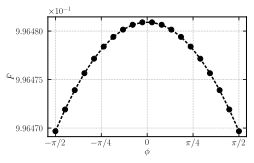

In [25]:
fig, ax = plot_lib.create_fig()
ax.plot(arg_list, avg_fid,'ko',linestyle=(0, (2, 1)))
ax.set_xlabel(r'$\phi$');
ax.set_ylabel(r'$\bar F$');
ax.set_xlim([-1.7,1.7])
ax.set_xticks([-pi/2,-pi/4,0,pi/4,pi/2])
ax.set_yticks([9.9647e-1,9.96475e-1,9.9648e-1])
ax.set_xticklabels([r'$-\pi/2$',r'$-\pi/4$',r'$0$',r'$\pi/4$',r'$\pi/2$'])
ax.grid(linestyle='--', linewidth=.5)
# Format the exponents nicely
ax.ticklabel_format(axis="y", style="sci", scilimits=(-0,-7), useOffset=False, useMathText=False)

In [34]:
fig.savefig('fig-avg-gate-fid-rz.pdf', dpi=300, transparent=False, bbox_inches='tight')

### RX-gate

In [32]:
avg_fid = []
## List of angles
arg_list = np.linspace(0,np.pi,20,endpoint=False)

## Loop over the list of angles and calculate the average gate fidelity
for arg in arg_list:
    ## Create quantum circuit
    qc = QubitCircuit(N=1)
    qc.add_gate("RX", 0, None, arg)
    arg = arg % (np.pi)
    ## Ideal gate
    U = (-1j*arg/2*sigma_x).expm()
    
    ## Average Gate Fidelity
    d = 2
    F = 0
    for sigma_k in sigma:
        ## Master equation
        result = kpo.run_state(init_state=sigma_k, qc=qc, noisy=True)
        final_state = result.states[-1]
        ## Target state
        target_state = U * sigma_k * U.dag()
        F += (target_state * final_state).tr().real
    
    avg_fid.append(1/2 + 1/12 * F)

In [33]:
np.mean(avg_fid)

0.9859761249934532

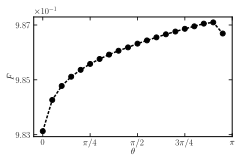

In [34]:
fig, ax = plot_lib.create_fig()
ax.plot(arg_list, avg_fid,'ko',linestyle=(0, (2, 1)))
ax.set_xlabel(r'$\theta$');
ax.set_ylabel(r'$\bar F$');
ax.set_xlim([-0.15,pi])
ax.set_xticks([0,pi/4,pi/2,3*pi/4,pi])
ax.set_yticks([9.83e-1,9.85e-1,9.87e-1])
ax.set_xticklabels([r'$0$',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])
# Format the exponents nicely
ax.ticklabel_format(axis="y", style="sci", scilimits=(-0,-7), useOffset=False, useMathText=False)

In [93]:
fig.savefig('fig-avg-gate-fid-rx.pdf', dpi=300, transparent=False, bbox_inches='tight')

## RY-gate

(<Figure size 864x432 with 1 Axes>,
 <AxesSubplot:xlabel='Time (1/K)', ylabel='Amplitude (K)'>)

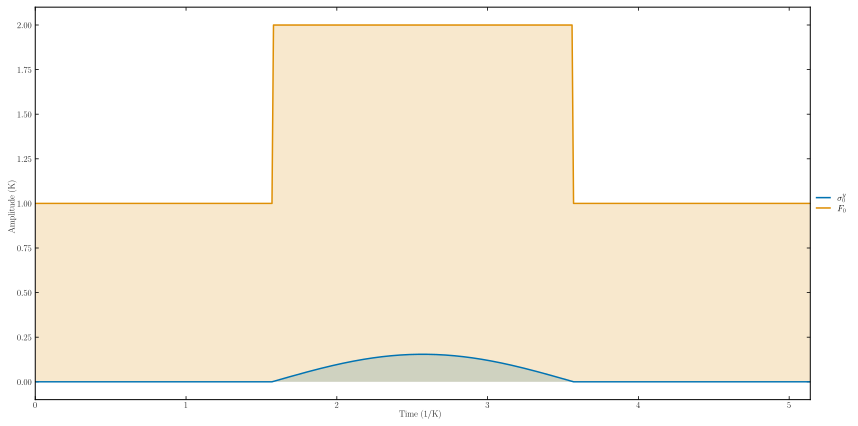

In [26]:
## Create quantum circuit
qc = QubitCircuit(N=1)
qc.add_gate("RY", 0, None, arg)

tlist, coeffs = kpo.load_circuit(qc)
kpo.plot_pulses()

In [27]:
avg_fid = []
## List of angles
arg_list = np.linspace(0,np.pi,10)
# For precise calculation
opt = Options(nsteps=25000, atol=1e-10, rtol=1e-8)

## Loop over the list of angles and calculate the average gate fidelity
for arg in arg_list:
    ## Create quantum circuit
    qc = QubitCircuit(N=1)
    qc.add_gate("RY", 0, None, arg)
    
    ## Ideal gate
    U = (-1j*arg/2*sigma_y).expm()
    
    ## Average Gate Fidelity
    F = 0
    for sigma_k in sigma:
        ## Master equation
        result = kpo.run_state(init_state=sigma_k, qc=qc, noisy=True, options=opt)
        final_state = result.states[-1]
        ## Target state
        target_state = U * sigma_k * U.dag()
        F += (target_state * final_state).tr().real
    avg_fid.append(1/2 + 1/12 * F)

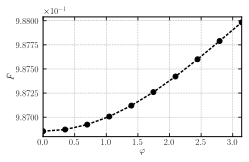

In [31]:
fig, ax = plot_lib.create_fig()
ax.plot(arg_list, avg_fid, 'ko',linestyle=(0, (2, 1)))

ax.set_xlabel(r'$\varphi$');
ax.set_ylabel(r'$\bar F$');
ax.grid(linestyle='--', linewidth=.5)
# Format the exponents nicely
ax.ticklabel_format(axis="y", style="sci", scilimits=(-0,-7), useOffset=False, useMathText=False)

### setup parameters for the two-qubit gates

In [75]:
## KPO parameters
kpo = KPOProcessor(N=2,num_lvl=12)
alpha = kpo._paras['Coherent state']
num_lvl = kpo._paras['Cut off']

## Cat state
cat_plus = (coherent(num_lvl,alpha) + coherent(num_lvl,-alpha)).unit()
cat_minus = (coherent(num_lvl,alpha) - coherent(num_lvl,-alpha)).unit()

## Computational basis
up = (cat_plus + cat_minus)/np.sqrt(2) # Binary 0
down = (cat_plus - cat_minus)/np.sqrt(2) # Binary 1

## Pauli Matrices in computational basis
# Identity
I = up*up.dag() + down*down.dag()
# sigma z
sigma_z = up*up.dag() - down*down.dag()
# sigma x
sigma_x = up*down.dag() + down*up.dag()
# sigma y
sigma_y = 1j*(-up*down.dag() + down*up.dag())
sigma = [I,sigma_x, sigma_y, sigma_z]

In [58]:
f = [] # fidelity

# initial state
psi0 = tensor([up-1j*down,up+1j*down]).unit()
Theta_list = np.linspace(0,np.pi,6)

# ideal gate
def U(Theta):
    return (-1j*Theta/2*tensor(sigma_z,sigma_z)).expm()

for Theta in Theta_list:
    ## Create quantum circuit
    qc = QubitCircuit(N=1)
    qc.user_gates = {"CARB": carb}
    qc.add_gate("CARB", targets = [0,1], arg_value = Theta)
    
    res = kpo.run_state(init_state=psi0, qc=qc, noisy=False)
    final_state = res.states[-1]
    target_state = U(Theta) * psi0
    f.append(fidelity(target_state,final_state))
f

[0.9919247983217977,
 0.9921972744132928,
 0.9929818406841681,
 0.9940948697456381,
 0.9952825153401887,
 0.9962862152791142]

In [59]:
target_state

Quantum object: dims = [[12, 12], [1, 1]], shape = (144, 1), type = ket
Qobj data =
[[ 0.        -0.01839294j]
 [ 0.03663161+0.j        ]
 [ 0.        -0.05202305j]
 [ 0.05981947+0.j        ]
 [ 0.        -0.06006958j]
 [ 0.05351005+0.j        ]
 [ 0.        -0.04384795j]
 [ 0.03309019+0.j        ]
 [ 0.        -0.02326614j]
 [ 0.01601111+0.j        ]
 [ 0.        -0.00891425j]
 [ 0.00784773+0.j        ]
 [-0.03663161+0.j        ]
 [ 0.        -0.07295595j]
 [-0.10360973+0.j        ]
 [ 0.        -0.11913717j]
 [-0.11963529+0.j        ]
 [ 0.        -0.10657125j]
 [-0.08732809+0.j        ]
 [ 0.        -0.06590281j]
 [-0.04633713+0.j        ]
 [ 0.        -0.03188792j]
 [-0.01775373+0.j        ]
 [ 0.        -0.01562963j]
 [ 0.        -0.05202305j]
 [ 0.10360973+0.j        ]
 [ 0.        -0.14714325j]
 [ 0.16919484+0.j        ]
 [ 0.        -0.16990225j]
 [ 0.15134912+0.j        ]
 [ 0.        -0.12402059j]
 [ 0.09359309+0.j        ]
 [ 0.        -0.06580652j]
 [ 0.04528622+0.j        

In [67]:
(1j*drift*2).expm() * final_state

Quantum object: dims = [[12, 12], [1, 1]], shape = (144, 1), type = ket
Qobj data =
[[ 0.00149169-0.01598045j]
 [ 0.03561955+0.01053001j]
 [ 0.00603405-0.04688207j]
 [ 0.05946279+0.01532719j]
 [ 0.0056143 -0.05434697j]
 [ 0.05321135+0.01384504j]
 [ 0.00611421-0.0386979j ]
 [ 0.03293659+0.00834832j]
 [ 0.00499505-0.01929289j]
 [ 0.01563842+0.0024531j ]
 [ 0.00198546-0.00888826j]
 [ 0.00331845-0.00048219j]
 [-0.03561955-0.01053001j]
 [ 0.04127307-0.06888294j]
 [-0.10058651-0.03140171j]
 [ 0.06397123-0.11289054j]
 [-0.11475852-0.03325229j]
 [ 0.05673436-0.10109493j]
 [-0.08266966-0.02455423j]
 [ 0.03494591-0.06178107j]
 [-0.04345767-0.01060619j]
 [ 0.01871716-0.02783751j]
 [-0.015304  -0.00255939j]
 [ 0.00881242-0.01302767j]
 [ 0.00603405-0.04688207j]
 [ 0.10058651+0.03140171j]
 [ 0.01895568-0.13507541j]
 [ 0.16537613+0.04834314j]
 [ 0.02219444-0.15570603j]
 [ 0.14872057+0.04170698j]
 [ 0.01841283-0.11132669j]
 [ 0.09127753+0.02500286j]
 [ 0.01175375-0.05865527j]
 [ 0.04293985+0.00772194j

In [5]:
def carb(arg_value):
    # control arbitrary phase gate
    zz = tensor(sigmaz(),sigmaz())
    return (-1j*arg_value/2*zz).expm()

In [76]:
avg_fid = []
## List of angles
arg_list = np.linspace(0,np.pi,1)

## Loop over the list of angles and calculate the average gate fidelity
for i, arg in enumerate(arg_list):
    ## Create quantum circuit
    qc = QubitCircuit(N=1)
    qc.user_gates = {"CARB": carb}
    qc.add_gate("CARB", targets = [0,1], arg_value = arg)
    
    ## Ideal gate
    U = (-1j*arg*tensor(sigma_z,sigma_z)/2).expm()
    
    # Progress bar
    progress = i / len(arg_list)
    print('%i %%'%(progress))
    
    ## Average Gate Fidelity
    d = 4
    F = 0
    for sigma_k in sigma:
        for sigma_l in sigma:
            sigma_kl = tensor(sigma_k,sigma_l)
            ## Master equation
            result = kpo.run_state(init_state=sigma_kl, qc=qc, noisy=False)
            drift = kpo.drift.drift_hamiltonians[0].qobj
            rot = (1j*drift*2).expm()
            final_state = rot * result.states[-1] * rot.dag()
            ## Target state
            target_state = U * sigma_kl.dag() * U.dag()
            F += abs((target_state * final_state).tr())
    avg_fid.append((F + d**2) / (d**2*(d+1)))

0 %
